In [1]:
import sqlite3
import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv('pokemon.csv')

# Create a connection to the SQLite database
conn = sqlite3.connect('pokemon.db')

# Write the dataframe to a SQL table
df.to_sql('pokemon', conn, if_exists='replace', index=False)

801

In [3]:
# Check for missing values
query = '''
SELECT *
FROM pokemon
WHERE name IS NULL OR type1 IS NULL OR type2 IS NULL OR hp IS NULL OR attack IS NULL
'''
null_values = pd.read_sql_query(query, conn)
print(f'The number of null values in the dataset is {len(null_values)}')

# Remove duplicates
query = '''
SELECT DISTINCT *
FROM pokemon
'''
df = pd.read_sql_query(query, conn)

The number of null values in the dataset is 384


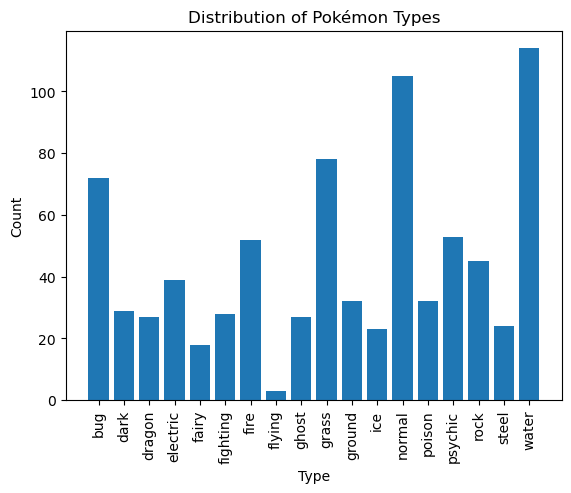

In [4]:
import matplotlib.pyplot as plt

# Count the number of Pokémon for each type
query = '''
SELECT type1, COUNT(*) AS count
FROM pokemon
GROUP BY type1
'''
df_type_counts = pd.read_sql_query(query, conn)

# Create a bar chart of the type counts
plt.bar(df_type_counts['type1'], df_type_counts['count'])
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Pokémon Types')
plt.show()

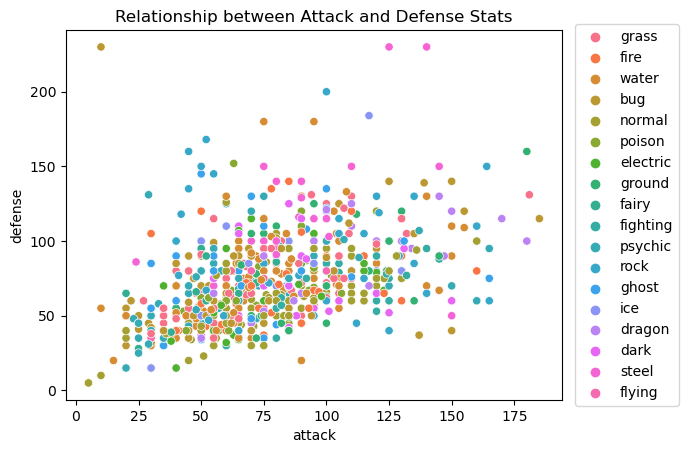

In [8]:
import seaborn as sns

sns.scatterplot(data=df, x='attack', y='defense', hue='type1')
plt.title('Relationship between Attack and Defense Stats')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

In [11]:
# Calculate the total stat points for each Pokémon
query = '''
SELECT name, (hp + attack + defense + sp_attack + sp_defense + speed) AS total_stats
FROM pokemon
'''
df_stats = pd.read_sql_query(query, conn)

# Sort by total stat points and select the top 10
df_stats = df_stats.sort_values(by='total_stats', ascending=False).head(10)
print(df_stats)

          name  total_stats
149     Mewtwo          780
383   Rayquaza          780
382    Groudon          770
381     Kyogre          770
492     Arceus          720
717    Zygarde          708
380     Latios          700
372  Salamence          700
247  Tyranitar          700
444   Garchomp          700


In [14]:
# Count the number of Pokémon for each type combination
query = '''
SELECT type1, type2, COUNT(*) AS count
FROM pokemon
GROUP BY type1, type2
ORDER BY count DESC
LIMIT 10
'''
df_type_combinations = pd.read_sql_query(query, conn)
print(df_type_combinations)

      type1   type2  count
0    normal    None     61
1     water    None     61
2     grass    None     37
3   psychic    None     35
4      fire    None     27
5  electric    None     26
6    normal  flying     26
7  fighting    None     22
8       bug    None     18
9     fairy    None     16
